# Quiz9
Peeraya Khantaruangsakul 63070501054

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

## 1. [20 points. 1 hour.] RANSAC Regression. 
Use RANSAC to find a, b, c for the following dataset where points (xi, yi) are discrete samples from a function f(x) = ax2 + bx + c with 2 outliers. Hint: You
should get a, b, and c close to 2.2, 0.5, -4.5, respectively.

In [2]:
import warnings
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
warnings.filterwarnings('ignore')
## copy from https://colab.research.google.com/drive/1lk_gyJ-bVwBySlz1_5q-jBrX8HIOArSq?authuser=2

In [3]:
x = np.array([-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([132, 100, 72, 48, 80, 14, 3, -3, -5, -2, -20, 17, 33, 53, 78, 107, 140])

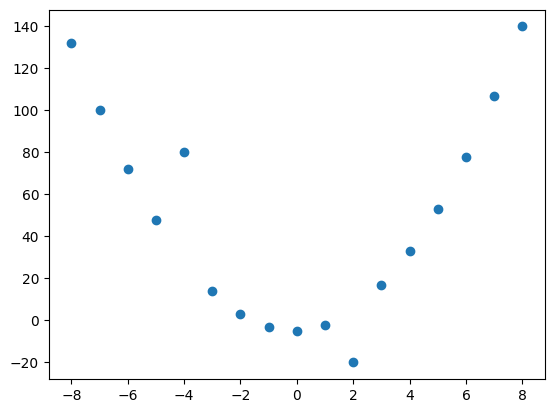

In [4]:
# 1. Plot the data
plt.plot(x, y, 'o')

In [5]:
# random a,b,c,d -10 < a,b,c < 10
a = 2.2
b = 0.5
c = -4.5

In [6]:
x = x.reshape(-1, 1)
print("X = ", x)
print("y = ", y)

X =  [[-8]
 [-7]
 [-6]
 [-5]
 [-4]
 [-3]
 [-2]
 [-1]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]]
y =  [132 100  72  48  80  14   3  -3  -5  -2 -20  17  33  53  78 107 140]


In [7]:
class PolynomialRegression(object):
#See https://scikit-learn.org/stable/developers/develop.html for Sklearn estimator attributes and methods
#Attributes: degree, coeffs 
#Key methods: fit, predict, and score. 
    def __init__(self, degree):
        print(f"Degree: {degree}")
        self.degree = degree

    def fit(self, X, y):
        self.coeffs = np.polyfit(X.ravel(), y, self.degree)

    def get_params(self, deep=False):
        return {'degree': self.degree}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def predict(self, X):
        poly_eqn = np.poly1d(self.coeffs)
        y_hat = poly_eqn(X.ravel())
        return y_hat

    def score(self, X, y):
        return mean_squared_error(y, self.predict(X))

In [8]:
#also try residual_threshold
ransac = RANSACRegressor(
    base_estimator=PolynomialRegression(degree=2),
    residual_threshold=5,
    random_state=0,
    min_samples=6
)

Degree: 2


In [9]:
ransac.fit(x, y)

Degree: 2


RANSACRegressor(base_estimator=<__main__.PolynomialRegression object at 0x000002766F8DB750>,
                estimator=<__main__.PolynomialRegression object at 0x000002766F8DB750>,
                min_samples=6, random_state=0, residual_threshold=5)

In [10]:
print("Estimated a b c: ", ransac.estimator_.coeffs)
print("Actual a b c:    ", np.array([a, b, c]))

Estimated a b c:  [ 2.20168149  0.50465825 -4.55078223]
Actual a b c:     [ 2.2  0.5 -4.5]


In [11]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [12]:
print('inlier x:', x[inlier_mask])
print('inlier y:', y[inlier_mask])
print('outlier x:', x[outlier_mask])
print('outlier y:', y[outlier_mask])

inlier x: [[-8]
 [-7]
 [-6]
 [-5]
 [-3]
 [-2]
 [-1]
 [ 0]
 [ 1]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]]
inlier y: [132 100  72  48  14   3  -3  -5  -2  17  33  53  78 107 140]
outlier x: [[-4]
 [ 2]]
outlier y: [ 80 -20]


In [13]:
x_list = []
y_list = []
co = ransac.estimator_.coeffs
for i in x:
  y_hat = co[0]*i**2 + co[1]*i + co[2]
  x_list.append(i)
  y_list.append(y_hat)
x_perfect = np.array(x_list)
y_perfect = np.array(y_list)

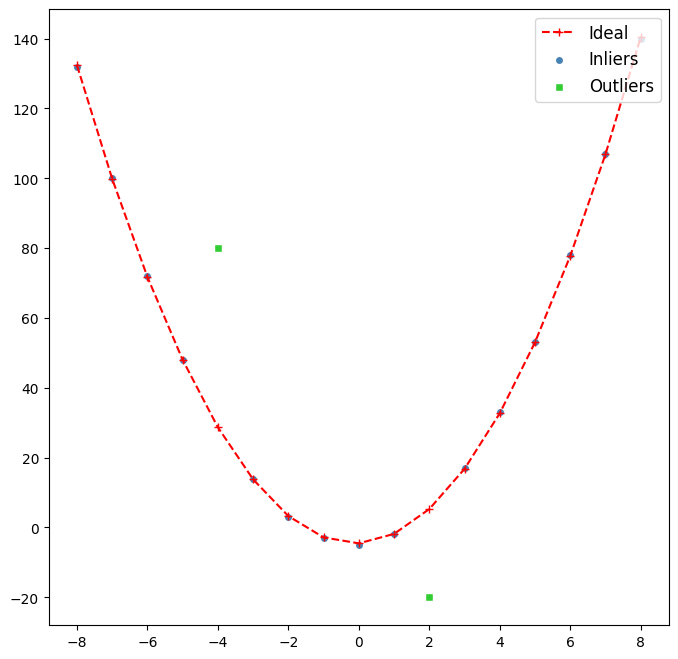

In [14]:
#Draw
#
# Create scatter plot for inlier datset
#
plt.figure(figsize=(8, 8))


#perfect curve
plt.plot(x_perfect, y_perfect,
            c='red', marker='+', linestyle= 'dashed', label='Ideal')

# Inlier scatter plot
plt.scatter(x[inlier_mask], y[inlier_mask],
             c='steelblue', edgecolor='white',
             marker='o', label='Inliers')
# Create scatter plot for outlier datset
#
plt.scatter(x[outlier_mask], y[outlier_mask],
             c='limegreen', edgecolor='white',
             marker='s', label='Outliers')
plt.legend(loc='upper right', fontsize=12)
plt.show()

## 2. Use K Means clustering on the IRIS dataset.

In [15]:
data_iris1 = load_iris()
df_iris1 = pd.DataFrame(data_iris1.data, columns=data_iris1.feature_names)
df_iris1['target'] = data_iris1.target

In [16]:
df_iris1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
# what is 1, 2, 3?
data_iris1.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- [10 points. 0.5 hour.] Using K = 3, cluster the entire dataset into 3 labels using only features 1 & 3; namely, sepal length and petal length (Note: the example in class used all 4 features for clustering). Show a scatter plot based on these 2 features using known training 3 classes using markers "<" for class 1 (Setosa), ">" for class 2 (Versicolor), and "^" for class 3 (Virginica) while also using colors based on the 3 computed clusters using colors of “pink” for cluster 1, “yellow” for cluster 2, and “cyan” for cluster 3.

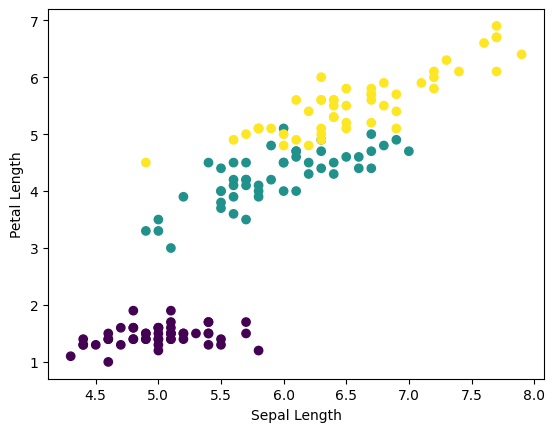

In [18]:
#Plotting the raw data before clustering
X = df_iris1.iloc[:, [0, 2]].values
y = df_iris1.iloc[:, 4].values

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

In [19]:
#Kmean
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Create a KMeans object with 3 clusters: model
model = KMeans(n_clusters=3, n_init= "auto")

# 2. Fit model to points
model.fit(X)

# 3. Determine the cluster labels of new_points: labels
labels = model.predict(X)

In [20]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

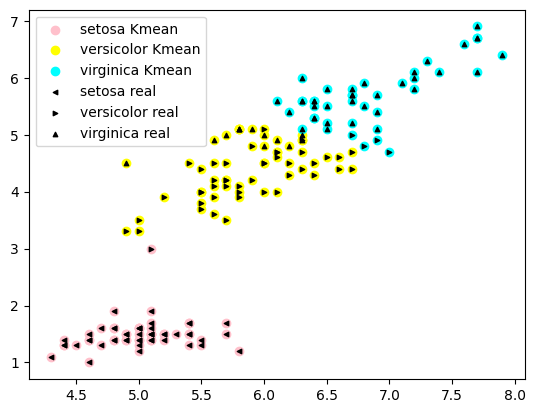

In [21]:
#Plotting the 3 classes found by K Means clustering vs. the actual class labels
#Plot of KMeans class labels with K = 3 using colored circles.  
plt.scatter(X[labels == 0][:,0] , X[labels == 0][:,1] , color = 'pink')
plt.scatter(X[labels == 1][:,0] , X[labels == 1][:,1] , color = 'yellow')
plt.scatter(X[labels == 2][:,0] , X[labels == 2][:,1] , color = 'cyan')

#Plot of actual class labels using <, >, ^.  
plt.scatter(X[y == 0][:,0] , X[y == 0][:,1] , marker = "<", color = 'black', s= 10)
plt.scatter(X[y == 1][:,0] , X[y == 1][:,1] , marker = ">", color = 'black', s= 10)
plt.scatter(X[y == 2][:,0] , X[y == 2][:,1] , marker = "^", color = 'black', s= 10)
plt.legend(['setosa Kmean', 'versicolor Kmean', 'virginica Kmean', 'setosa real', 'versicolor real', 'virginica real'])
plt.show()

- [5 points.] Report based on known labels what percent is misclassified when using 2 features.

In [22]:
# find accuracy percent
from sklearn.metrics import accuracy_score
print("Accuracy score: %5.1f%%" %(accuracy_score(y, labels) *100))


Accuracy score:  88.0%


- [10 points. 0.5 hour.] Plot the result of K Means clustering using all 4 features with K = 4.

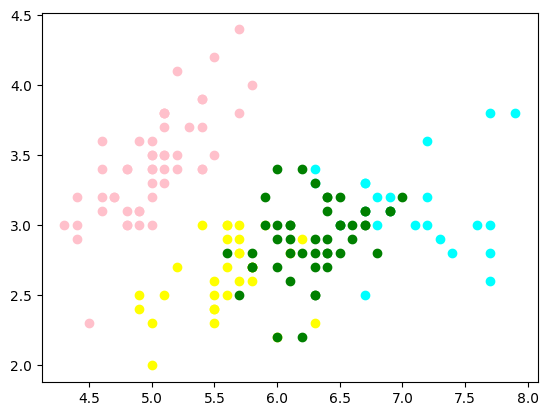

In [23]:
# 1. Create a KMeans object with 3 clusters: model
new_x = df_iris1.iloc[:, [0, 1, 2, 3]].values
new_y = df_iris1.iloc[:, 4].values
new_model = KMeans(n_clusters=4, n_init= "auto")

new_model = new_model.fit(new_x)
new_labels = new_model.predict(new_x)

#Plotting the 3 classes found by K Means clustering vs. the actual class labels
#Plot of KMeans class labels with K = 3 using colored circles.
plt.scatter(new_x[new_labels == 0][:,0] , new_x[new_labels == 0][:,1] , color = 'pink')
plt.scatter(new_x[new_labels == 1][:,0] , new_x[new_labels == 1][:,1] , color = 'yellow')
plt.scatter(new_x[new_labels == 2][:,0] , new_x[new_labels == 2][:,1] , color = 'cyan')
plt.scatter(new_x[new_labels == 3][:,0] , new_x[new_labels == 3][:,1] , color = 'green')
plt.show()


In [24]:
# show accuracy
print("Accuracy score: %5.1f%%" %(accuracy_score(new_y, new_labels) *100))

Accuracy score:  68.0%


- [15 points. 1 hour.] Reduce the 4 features (sepal length, sepal width, petal length, petal width) into 2 PCA
features (an example is also provided in class). Use K = 3 to cluster the entire dataset using these 2 PCA
features. Show a scatter plot like in problem 2.1 along with percent misclassified as in problem 2.2.

In [25]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
new_x = df_iris1.iloc[:, [0, 1, 2, 3]].values
new_y = df_iris1.iloc[:, 4].values
pca = PCA(n_components=2)
kmeans = KMeans(n_clusters=3)
pipeline = Pipeline([('pca', pca), ('kmeans', kmeans)])
pipeline.fit(new_x)
labels = pipeline.predict(new_x)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


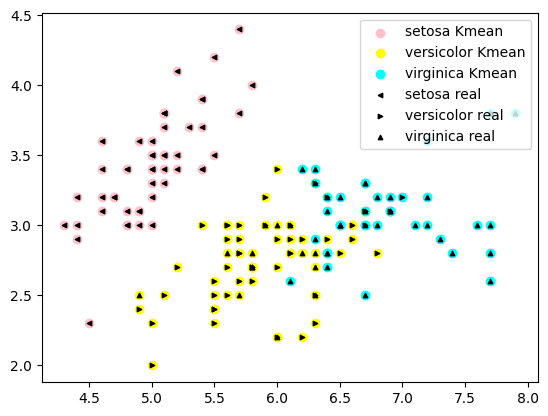

In [26]:
#Plotting the 3 classes found by K Means clustering vs. the actual class labels
#Plot of KMeans class labels with K = 3 using colored circles.
plt.scatter(new_x[labels == 0][:,0] , new_x[labels == 0][:,1] , color = 'pink')
plt.scatter(new_x[labels == 1][:,0] , new_x[labels == 1][:,1] , color = 'yellow')
plt.scatter(new_x[labels == 2][:,0] , new_x[labels == 2][:,1] , color = 'cyan')

#Plot of actual class labels using <, >, ^.
plt.scatter(new_x[new_y == 0][:,0] , new_x[new_y == 0][:,1] , marker = "<", color = 'black', s= 10)
plt.scatter(new_x[new_y == 1][:,0] , new_x[new_y == 1][:,1] , marker = ">", color = 'black', s= 10)
plt.scatter(new_x[new_y == 2][:,0] , new_x[new_y == 2][:,1] , marker = "^", color = 'black', s= 10)
plt.legend(['setosa Kmean', 'versicolor Kmean', 'virginica Kmean', 'setosa real', 'versicolor real', 'virginica real'])
plt.show()

In [27]:
# accuracy
print("Accuracy score: %5.1f%%" %(accuracy_score(new_y, labels) *100))

Accuracy score:  88.7%


- [20 points.] Redo the example in class with all 4 features and K = 3, but using your own class or function
my_k_means in Python that has initialization parameters: K, X, max_iterations, centroid_move_epsilon and
returns y as a 1-D array of integer labels of 1, 2, ..., K.. Each input N-dimensional data X[i] will have a
1-dimensional output label y[i] for i = 1..M where M is the number of data points. The algorithm should start
by assigning K cluster centers based on random values from the (min, max) range of each dimension in the
N-dimensional data X. It should stop when all centers have moved by less than the centroid_move_epsilon or
when the max_iterations is reached. Make sure your results are similar to the K Means library class.

![image.png](https://files.realpython.com/media/kmeans-algorithm.a94498a7ecd2.png)

In [28]:
def my_k_means(K, X, max_iterations, centroid_move_epsilon):
    # random centroids K points
    centroids = X[np.random.choice(X.shape[0], K, replace=False), :]

    # loop
    for i in range(max_iterations):
        # assign points to clusters
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        clusters = np.argmin(distances, axis=0)

        # move centroids
        new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(K)])

        # check for convergence
        if np.sqrt(((new_centroids - centroids)**2).sum(axis=1)).max() < centroid_move_epsilon:
            break

        centroids = new_centroids

    return clusters


In [29]:
# use my_k_means
new_x = df_iris1.iloc[:, [0, 1, 2, 3]].values
new_y = df_iris1.iloc[:, 4].values
clusters= my_k_means(3, new_x, 100, 0.001)
print(f"My_k_mean Clusters : {clusters}")
#acuracy
print("My_k_mean Accuracy score: %5.1f%%" %(accuracy_score(new_y, clusters) *100))



My_k_mean Clusters : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
My_k_mean Accuracy score:  88.7%


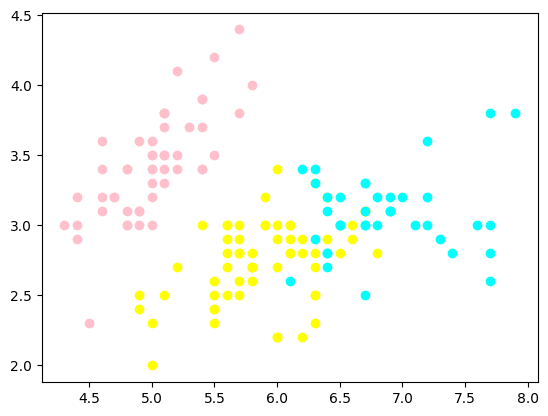

In [30]:
# plot my_k_means
plt.scatter(new_x[clusters == 0][:,0] , new_x[clusters == 0][:,1] , color = 'pink')
plt.scatter(new_x[clusters == 1][:,0] , new_x[clusters == 1][:,1] , color = 'yellow')
plt.scatter(new_x[clusters == 2][:,0] , new_x[clusters == 2][:,1] , color = 'cyan')

In [41]:
# use KMenas
model = KMeans(n_clusters=3, max_iter=100 , tol= 0.001)

model = model.fit(new_x)
labels = model.predict(new_x)
print(f"Kmean Clusters : {labels}")
# accuracy
print("Kmean Accuracy score: %5.1f%%" %(accuracy_score(new_y, labels) *100))

Kmean Clusters : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Kmean Accuracy score:  89.3%


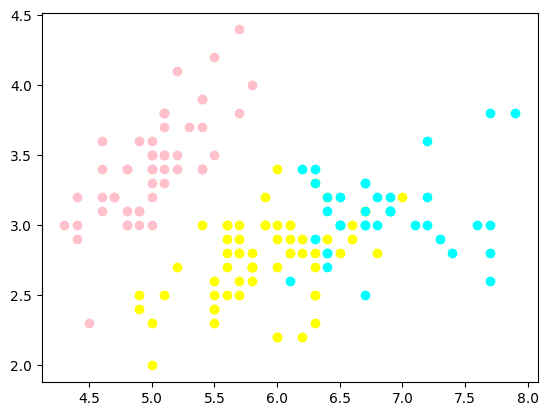

In [42]:
# plot Kmean
plt.scatter(new_x[labels == 0][:,0] , new_x[labels == 0][:,1] , color = 'pink')
plt.scatter(new_x[labels == 1][:,0] , new_x[labels == 1][:,1] , color = 'yellow')
plt.scatter(new_x[labels == 2][:,0] , new_x[labels == 2][:,1] , color = 'cyan')

## 3. [15 points. 1 hour.] Decision Trees.
Change the “IRIS Decision Tree.ipynb” shown in class, to use
SKlearn’s Wine Recognition Dataset instead. Report the classification accuracy % for a single tree using 70%
training samples and for a random forest with 100 estimators.

### Decision Tree

In [33]:
from sklearn.datasets import load_wine
from sklearn import tree

In [34]:
#Load the data
wine = load_wine()
X = wine.data
y = wine.target

In [35]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [36]:
#Fit the data
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

# accuracy
print("Decision Tree Accuracy score: %5.1f%%" %(accuracy_score(y, clf.predict(X)) *100))

Decision Tree Accuracy score: 100.0%


In [37]:
#Output of classifire in text format
from sklearn.tree import export_text
r = export_text(clf, feature_names=wine['feature_names'])
print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- flavanoids <= 0.56
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  0.56
|   |   |   |   |--- class: 1
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- color_intensity <= 4.06
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- color_intensity >  4.06
|   |   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- malic_acid <= 2.08
|   |   |   |--- class: 1
|   |   |--- malic_acid >  2.08
|   |   |   |--- class: 2
|   |--- flavanoids >  2.17
|   |   |--- magnesium <= 135.

[Text(0.5657894736842105, 0.9166666666666666, 'x[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(0.34210526315789475, 0.75, 'x[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(0.21052631578947367, 0.5833333333333334, 'x[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(0.10526315789473684, 0.4166666666666667, 'x[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3157894736842105, 0.4166666666666667, 'x[6] <= 0.565\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3684210526315789, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.47368421052631576, 0.5833333333333334, 'x[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(0.42105

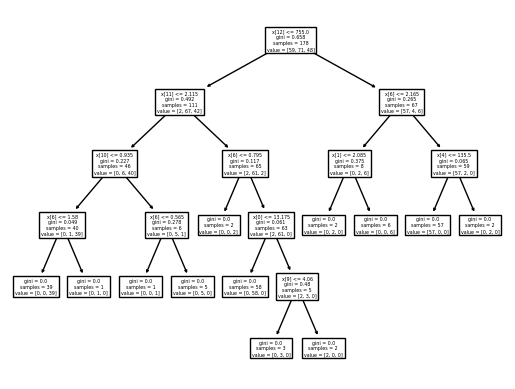

In [38]:
#Plot the decision tree in graphical format
tree.plot_tree(clf)

### Random forest

In [39]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [40]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# accuracy
print("Random Forest Accuracy score: %5.1f%%" %(accuracy_score(y_test, y_pred) *100))

Random Forest Accuracy score:  98.1%
